# **Credit Card**
- https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?datasetId=982921&searchQuery=ML&language=Python

# **Importação das bibliotecas e base de dados**

In [1]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [188]:
# carregar a base de dados
import pandas as pd
# para termos acesso as funções matemáticas
import numpy as np
# biblioteca para gerar gráficos
import seaborn as sns
# também para gerar gráficos
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
creditcard = pd.read_csv('/content/BankChurners.csv')
# Visualizar
creditcard.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
# Ver quantidade de linhas e colunas
creditcard.shape

(10127, 23)

# **Na descrição dos dados, diz ignore as últimas 2 colunas (Naive_Bayes_Class..)**

In [5]:
creditcard.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [6]:
# Visualizar
creditcard.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
# Ver as informações
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# **Informação do dataset**

- CLIENTNUM - Número do cliente. Identificador único para o cliente titular da conta
- Attrition_Flag - Variável de evento interno (atividade do cliente) - se a conta for fechada, então 1 senão 0
- Customer_Age - Idade do cliente em anos
- Gender - M=Masculino, F=Feminino
- Dependent_count - Número de dependentes
- Education_Level - Qualificação educacional do titular da conta (exemplo: ensino médio, ensino superior, etc.)
- Marital_Status - Casado, Solteiro, Divorciado, Desconhecido
- Income_Category - Categoria de renda anual do titular da conta (< US$ 40 mil, US$ 40 mil - 60 mil, US$ 60 mil - US$ 80
- Card_Category - Tipo de Cartão (Azul, Prata, Ouro, Platina)
- Months_on_book - Período de relacionamento com o banco
- Total_Relationship_Count - Nº total de produtos detidos pelo cliente
- Months_Inactive_12_mon - Nº de meses inativos nos últimos 12 meses
- Contacts_Count_12_mon - Nº de contatos nos últimos 12 meses
- Credit_Limit - Limite de crédito no cartão de crédito
- Total_Revolving_Bal - Saldo Rotativo Total no Cartão de Crédito
- Avg_Open_To_Buy - Linha de crédito aberta para compra (média dos últimos 12 meses)
- Total_Amt_Chng_Q4_Q1 - Alteração no valor da transação (4º trimestre em relação ao primeiro trimestre)
- Total_Trans_Amt - Valor total da transação (últimos 12 meses)
- Total_Trans_Ct - Contagem total de transações (últimos 12 meses)
- Total_Ct_Chng_Q4_Q1 - Alteração na contagem de transações (4º trimestre em relação ao primeiro trimestre)
- Avg_Utilization_Ratio - Taxa média de utilização do cartão

In [8]:
# Visualizar
creditcard.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
# Visualizar a descrição
creditcard.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# **Vamos retirar a coluna de "CLIENTNUM" que é um edificador de cliente. Então podemos excluir sem problemas nenhum.**

In [10]:
creditcard.drop(['CLIENTNUM'], axis=1, inplace=True)

In [11]:
# Visualizar
creditcard.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
# Ver a quantidade de linhas e colunas
creditcard.shape

(10127, 20)

In [13]:
# Todas as colunas
colunas = creditcard.columns
# Vamos encontrar as colunas númericas
num_colunas = creditcard._get_numeric_data().columns
# Temos 14 colunas numericas
num_colunas

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [14]:
# Vamos ver as colunas Categoricas
categorica = list(set(colunas) - set(num_colunas))
# Temos 7 colunas categoricas
categorica

['Education_Level',
 'Card_Category',
 'Income_Category',
 'Gender',
 'Attrition_Flag',
 'Marital_Status']

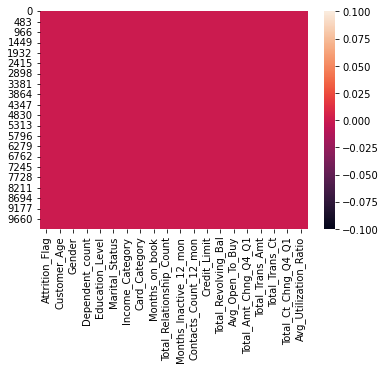

In [15]:
# Visualizar se tem dados faltantes
sns.heatmap(creditcard.isnull());

In [16]:
# Visualizar a quantidade de dados nulos
creditcard.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# **VAMOS EXPLORAR OS DADOS CATEGÓRICOS**

In [17]:
# Explorando dados categoricos
creditcard['Attrition_Flag'].value_counts()
#Clientes Existente e Clientes Desligado
# Como podemos ver aqui, o conjunto de dados não é distribuído igualmente de acordo com Attrition_Flag(Sinalizador de atrito).creditcard

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [18]:
# Explorando dados categoricos
creditcard['Attrition_Flag'].value_counts()
#Clientes Existente e Clientes Desligado
# Como podemos ver aqui, o conjunto de dados não é distribuído igualmente de acordo com Attrition_Flag(Sinalizador de atrito).

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

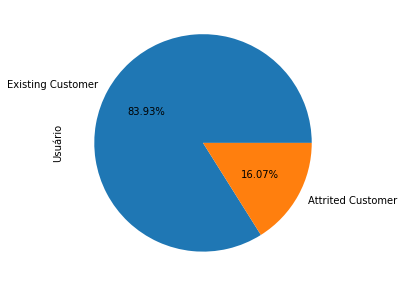

In [19]:
#Apenas 16,07% dos clientes que desistiram entre 10 mil clientes.
creditcard['Attrition_Flag'].value_counts().plot(kind= 'pie', autopct='%0.2f%%', figsize=(5,5), label = 'Usuário')

# **Vamos ver quantidade de posentagem de dados desconhecidos que temos**

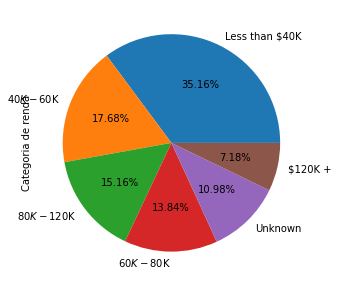

In [20]:
creditcard['Income_Category'].value_counts().plot(kind= 'pie', autopct='%0.2f%%', figsize=(5,5), label = 'Categoria de renda')

In [21]:
# Se eu remover dados desconhecidos de income_category, estou perdendo 11% dos meus dados, então vou deixá-los.
creditcard[creditcard['Income_Category']!='Unknown']['Attrition_Flag'].value_counts()

Existing Customer    7575
Attrited Customer    1440
Name: Attrition_Flag, dtype: int64

In [22]:
# Categoria Nível de educação
creditcard['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

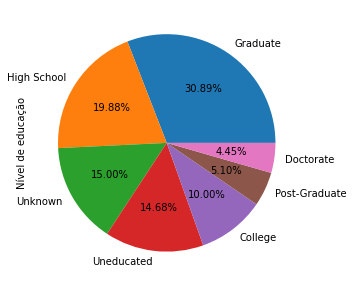

In [23]:
creditcard['Education_Level'].value_counts().plot(kind= 'pie', autopct='%0.2f%%', figsize=(5,5), label = 'Nível de educação')

In [24]:
# Se eu remover dados desconhecidos de Education_Level, estou perdendo 15% dos meus dados, então vou deixá-los.
creditcard[creditcard['Education_Level']!='Unknown']['Attrition_Flag'].value_counts()

Existing Customer    7237
Attrited Customer    1371
Name: Attrition_Flag, dtype: int64

In [25]:
# Categoria de Estado civil
creditcard['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

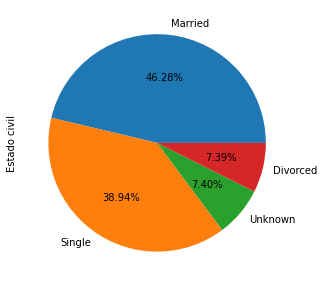

In [26]:
creditcard['Marital_Status'].value_counts().plot(kind= 'pie', autopct='%0.2f%%', figsize=(5,5), label = 'Estado civil')

In [27]:
# Se eu remover dados desconhecidos de Marital_Status, estou perdendo 7.40% dos meus dados, então vou deixá-los.
creditcard[creditcard['Marital_Status']!='Unknown']['Attrition_Flag'].value_counts()

Existing Customer    7880
Attrited Customer    1498
Name: Attrition_Flag, dtype: int64

In [28]:
#Se eu remover todos os dados 'desconhecidos', perco mais de 30% dos meus dados, então vou deixá-los
creditcard[(creditcard['Income_Category']!='Unknown') & (creditcard['Education_Level']!='Unknown') & (creditcard['Marital_Status']!='Unknown')]['Attrition_Flag'].value_counts()

Existing Customer    5968
Attrited Customer    1113
Name: Attrition_Flag, dtype: int64

# **Transformando clientes em 0(clientes Existente) e 1(Clientes Desligado)**

In [29]:
# Precisamos transformar Clientes Existente em 0 e Clientes Desligado em 1
creditcard['Attrition_Flag'].replace(('Existing Customer','Attrited Customer'), (0,1), inplace=True)

# **Renomear a coluna 'Attritiong_Flag' para 'Usuario'**

In [30]:
# Vamos renomear a coluna para usuario
creditcard.rename(columns={'Attrition_Flag':'Usuario'}, inplace=True)

In [31]:
creditcard.head()

,Usuario,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **Visualização dos dados**

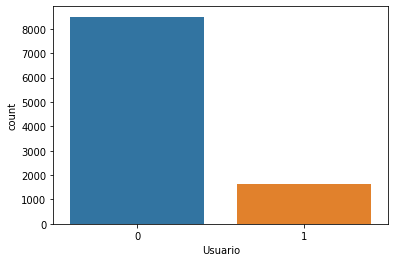

In [32]:
sns.countplot(x = creditcard['Usuario']);

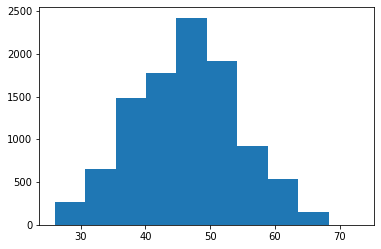

In [33]:
plt.hist(x =creditcard['Customer_Age']);

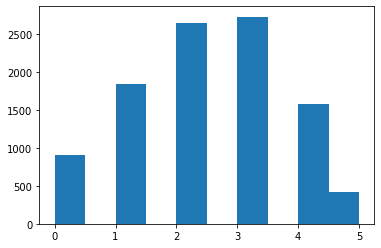

In [34]:
plt.hist(x =creditcard['Dependent_count']);

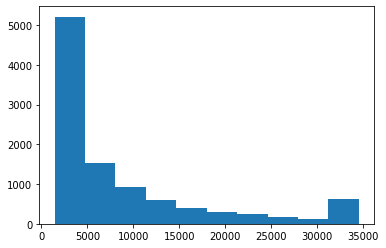

In [35]:
plt.hist(x =creditcard['Credit_Limit']);

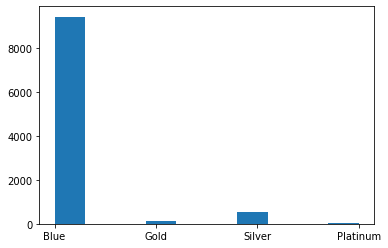

In [36]:
plt.hist(x =creditcard['Card_Category']);

In [37]:
grafico = px.treemap(creditcard, path=['Usuario','Customer_Age'])
grafico.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a27e3f910>,
      dtype=object)

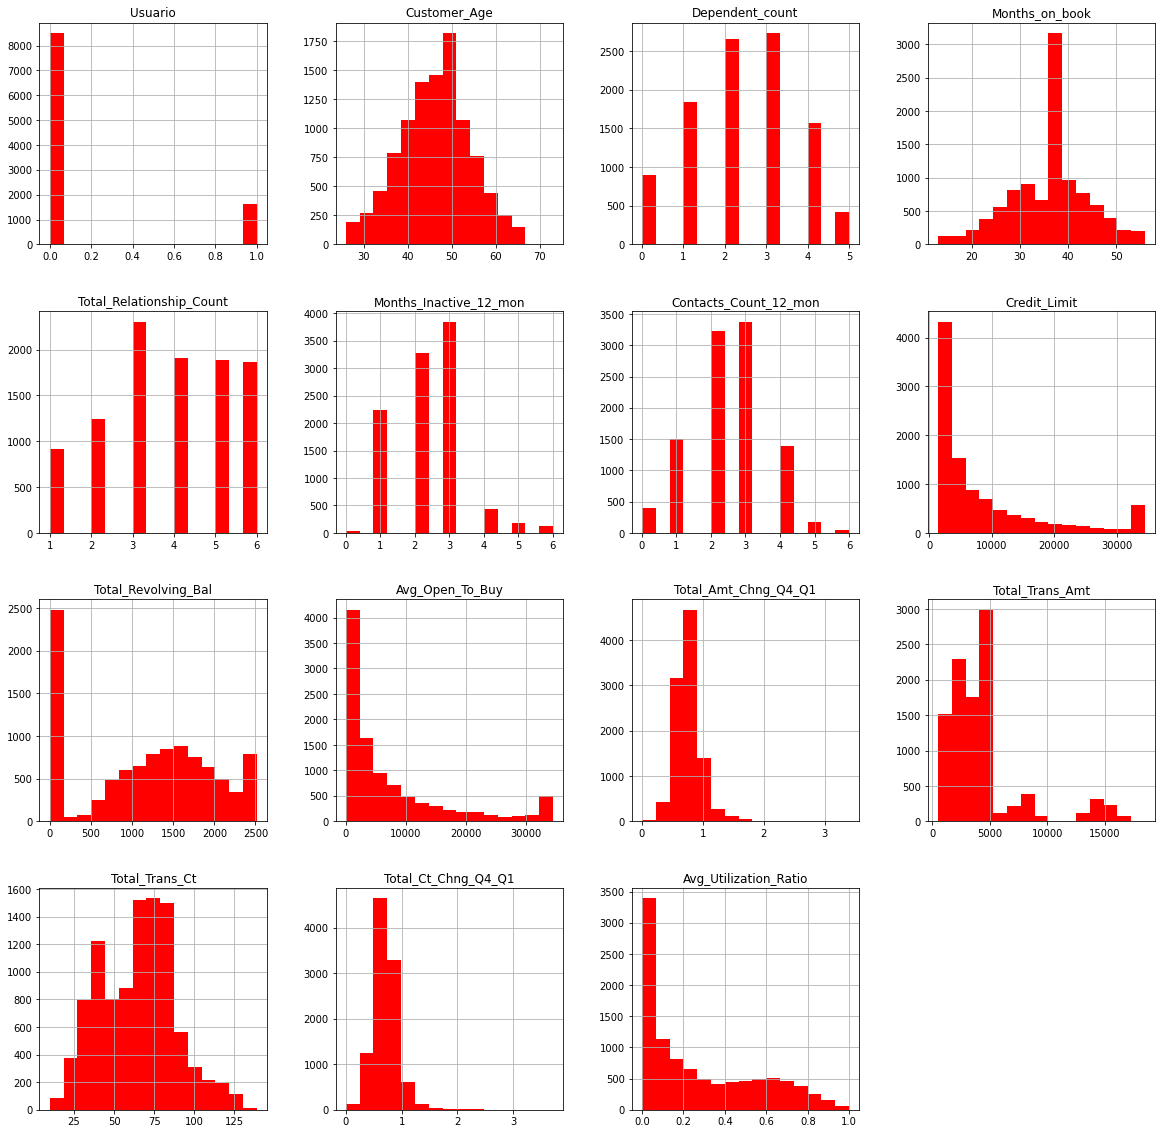

In [38]:
# bins (15 faixa de valores)
creditcard.hist(bins = 15, figsize = (20,20), color = 'r')

# **Divisão entre previsores e classe**

In [46]:
creditcard.columns

Index(['Usuario', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [47]:
# define x e y
X = creditcard.drop('Usuario', axis = 1).values
y =creditcard['Usuario'].values


In [48]:
X

array([[45, 'M', 3, ..., 42, 1.625, 0.061],
       [49, 'F', 5, ..., 33, 3.714, 0.105],
       [51, 'M', 3, ..., 20, 2.333, 0.0],
       ...,
       [44, 'F', 1, ..., 60, 0.818, 0.0],
       [30, 'M', 2, ..., 62, 0.722, 0.0],
       [43, 'F', 2, ..., 61, 0.649, 0.189]], dtype=object)

In [49]:
y

array([0, 0, 0, ..., 1, 1, 1])

# **Tratamento de atributos categóricos**

# LabelEncoder

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
label_encoder_teste = LabelEncoder()

In [52]:
# Todas as colunas
colunas = creditcard.columns
# Vamos encontrar as colunas númericas
num_colunas = creditcard._get_numeric_data().columns
# Temos 14 colunas numericas
num_colunas

Index(['Usuario', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [53]:
# Vamos ver as colunas Categoricas
categorica = list(set(colunas) - set(num_colunas))
# Temos 7 colunas categoricas
categorica

['Education_Level',
 'Card_Category',
 'Income_Category',
 'Gender',
 'Marital_Status']

In [54]:
X[:,1]

array(['M', 'F', 'M', ..., 'F', 'M', 'F'], dtype=object)

In [55]:
teste = label_encoder_teste.fit_transform(X[:,1])

In [56]:
teste

array([1, 0, 1, ..., 0, 1, 0])

In [57]:
label_encoder_education_Level = LabelEncoder()
label_encoder_income_Category = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_marital_Status = LabelEncoder()
label_encoder_card_Category = LabelEncoder()


In [58]:
X[:,1]

array(['M', 'F', 'M', ..., 'F', 'M', 'F'], dtype=object)

In [59]:
X[:,3]

array(['High School', 'Graduate', 'Graduate', ..., 'High School',
       'Graduate', 'Graduate'], dtype=object)

In [60]:
X[:,1] = label_encoder_gender.fit_transform(X[:,1])
X[:,3] = label_encoder_education_Level.fit_transform(X[:,3])
X[:,4] = label_encoder_marital_Status.fit_transform(X[:,4])
X[:,5] = label_encoder_income_Category.fit_transform(X[:,5])
X[:,6] = label_encoder_card_Category.fit_transform(X[:,6])

In [61]:
X[:,1]

array([1, 0, 1, ..., 0, 1, 0], dtype=object)

In [62]:
X[:,3]

array([3, 2, 2, ..., 3, 2, 2], dtype=object)

# OneHotEncoder

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [64]:
onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,4,5,6])], remainder='passthrough')

In [65]:
X=onehotencoder.fit_transform(X)

In [66]:
X

array([[0.0, 1.0, 0.0, ..., 42, 1.625, 0.061],
       [1.0, 0.0, 0.0, ..., 33, 3.714, 0.105],
       [0.0, 1.0, 0.0, ..., 20, 2.333, 0.0],
       ...,
       [1.0, 0.0, 0.0, ..., 60, 0.818, 0.0],
       [0.0, 1.0, 0.0, ..., 62, 0.722, 0.0],
       [1.0, 0.0, 0.0, ..., 61, 0.649, 0.189]], dtype=object)

# Escalonamento dos valores

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
X[0]

array([-1.05995565,  1.05995565, -0.33338819, -0.21589388, -0.66852149,
        2.00768518, -0.23170775, -0.41485718, -0.42007589, -0.2824051 ,
        1.07733799, -0.79850685, -0.28260887, -0.27810147, -0.46336328,
        2.49464476, -0.42267548, -0.73643691, -0.35121215,  0.27061076,
       -0.10764411, -0.044484  , -0.24079371, -0.16540558,  0.50336813,
        0.38462088,  0.76394261, -1.32713603,  0.49240377,  0.4466219 ,
       -0.47342222,  0.48897082,  2.62349444, -0.95970657, -0.97389518,
        3.8340026 , -0.77588223])

# Divisão das bases em treinamento e teste

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
#treinar divisão de teste
# stratify = y preserva a proporção do alvo como no conjunto de dados original nos conjuntos de dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=0)

In [71]:
X_train.shape

(8607, 37)

In [72]:
y_train.shape

(8607,)

In [73]:
X_test.shape,  y_test.shape

((1520, 37), (1520,))

# Vamos salvar as variáveis para não ter que ficar rodando tudo de novo

In [74]:
import pickle

In [75]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

# Naive Bayes - 88%

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
with open('credit.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [78]:
X_train.shape, y_train.shape

((8607, 37), (8607,))

In [79]:
X_test.shape,  y_test.shape

((1520, 37), (1520,))

In [80]:
naive = GaussianNB()
naive.fit(X_train, y_train)
previsoes = naive.predict(X_test)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
accuracy_score(y_test, previsoes)

0.8789473684210526

In [84]:
confusion_matrix(y_test, previsoes)

array([[1188,   88],
       [  96,  148]])

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1276
           1       0.63      0.61      0.62       244

    accuracy                           0.88      1520
   macro avg       0.78      0.77      0.77      1520
weighted avg       0.88      0.88      0.88      1520

A acurácia é  0.8789473684210526


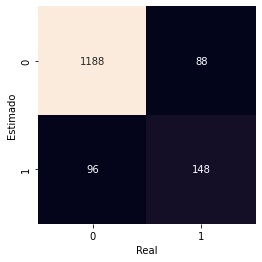

In [85]:
mat = confusion_matrix(y_test, previsoes)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(y_test, previsoes)) # mostra relatório
print('A acurácia é ',accuracy_score(y_test, previsoes)) # exibe acurácia

# Árvores de decisão - 95%

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
with open('credit.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [88]:
X_train.shape, y_train.shape

((8607, 37), (8607,))

In [89]:
X_test.shape,  y_test.shape

((1520, 37), (1520,))

In [90]:
# 'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'
arvore = DecisionTreeClassifier(criterion='entropy',min_samples_leaf= 10, min_samples_split=10, splitter='best', random_state=0)
arvore.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10, random_state=0)

In [91]:
previsoes = arvore.predict(X_test)
previsoes

array([0, 1, 0, ..., 0, 0, 0])

In [92]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1276
           1       0.89      0.81      0.85       244

    accuracy                           0.95      1520
   macro avg       0.93      0.90      0.91      1520
weighted avg       0.95      0.95      0.95      1520

A acurácia é  0.9539473684210527


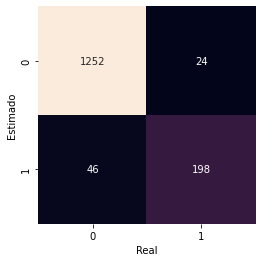

In [94]:
mat = confusion_matrix(y_test, previsoes)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(y_test, previsoes)) # mostra relatório
print('A acurácia é ',accuracy_score(y_test, previsoes)) # exibe acurácia

In [95]:
accuracy_score(y_test, previsoes)

0.9539473684210527

In [96]:
confusion_matrix(y_test, previsoes)

array([[1252,   24],
       [  46,  198]])

# Random Forest - 95%

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
with open('credit.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [99]:
X_train.shape, y_train.shape

((8607, 37), (8607,))

In [100]:
X_test.shape,  y_test.shape

((1520, 37), (1520,))

In [101]:
# 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [102]:
previsoes = random_forest.predict(X_test)
previsoes

array([0, 1, 0, ..., 0, 0, 0])

In [103]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1276
           1       0.95      0.75      0.84       244

    accuracy                           0.95      1520
   macro avg       0.95      0.87      0.91      1520
weighted avg       0.95      0.95      0.95      1520

A acurácia é  0.9532894736842106


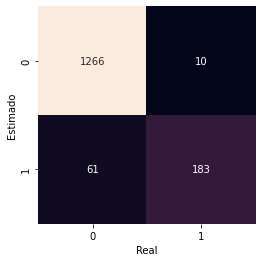

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(y_test, previsoes)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(y_test, previsoes)) # mostra relatório
print('A acurácia é ',accuracy_score(y_test, previsoes)) # exibe acurácia

# Aprendizagem baseada em instâncias - KNN - 88%

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
with open('credit.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [107]:
X_train.shape, y_train.shape

((8607, 37), (8607,))

In [108]:
X_test.shape,  y_test.shape

((1520, 37), (1520,))

In [109]:
# 'n_neighbors': 5, 'p': 1
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [110]:
previsoes = knn.predict(X_test)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1276
           1       0.80      0.37      0.50       244

    accuracy                           0.88      1520
   macro avg       0.84      0.68      0.72      1520
weighted avg       0.88      0.88      0.87      1520

A acurácia é  0.8835526315789474


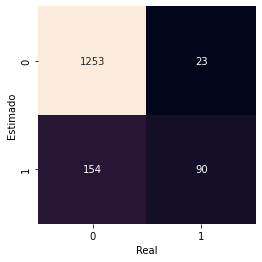

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(y_test, previsoes)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(y_test, previsoes)) # mostra relatório
print('A acurácia é ',accuracy_score(y_test, previsoes)) # exibe acurácia

# Regressão logística - 91%

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
with open('credit.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [115]:
X_train.shape, y_train.shape

((8607, 37), (8607,))

In [116]:
X_test.shape,  y_test.shape

((1520, 37), (1520,))

In [117]:
# 'C': 2.0, 'solver': 'sag', 'tol': 0.0001
logistic = LogisticRegression(C=2.0, solver= 'sag', tol=0.0001, random_state = 1)
logistic.fit(X_train, y_train)

LogisticRegression(C=2.0, random_state=1, solver='sag')

In [118]:
previsoes = logistic.predict(X_test)
previsoes

array([0, 1, 0, ..., 0, 0, 0])

In [119]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1276
           1       0.76      0.60      0.67       244

    accuracy                           0.91      1520
   macro avg       0.84      0.78      0.81      1520
weighted avg       0.90      0.91      0.90      1520

A acurácia é  0.9052631578947369


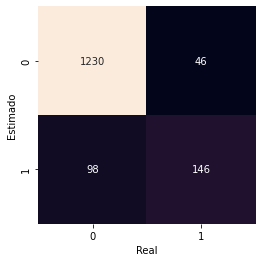

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(y_test, previsoes)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(y_test, previsoes)) # mostra relatório
print('A acurácia é ',accuracy_score(y_test, previsoes)) # exibe acurácia

#  SVM - 92%

In [121]:
from sklearn.svm import SVC

In [122]:
with open('credit.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [123]:
X_train.shape, y_train.shape

((8607, 37), (8607,))

In [124]:
X_test.shape,  y_test.shape

((1520, 37), (1520,))

In [125]:
# 'C': 2.0, 'kernel': 'rbf', 'tol': 0.001
svm = SVC(C=2.0, kernel='rbf', tol=0.001)
svm.fit(X_train, y_train)

SVC(C=2.0)

In [126]:
previsoes = svm.predict(X_test)
previsoes

array([0, 1, 0, ..., 0, 0, 0])

In [127]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1276
           1       0.84      0.65      0.73       244

    accuracy                           0.92      1520
   macro avg       0.89      0.81      0.84      1520
weighted avg       0.92      0.92      0.92      1520

A acurácia é  0.9230263157894737


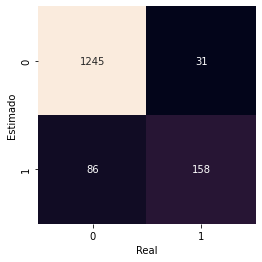

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(y_test, previsoes)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(y_test, previsoes)) # mostra relatório
print('A acurácia é ',accuracy_score(y_test, previsoes)) # exibe acurácia

# Redes neurais artificiais - 93%

In [129]:
from sklearn.neural_network import MLPClassifier

In [130]:
with open('credit.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [131]:
X_train.shape, y_train.shape

((8607, 37), (8607,))

In [132]:
X_test.shape,  y_test.shape

((1520, 37), (1520,))

In [133]:
# activation': 'logistic', 'batch_size': 56, 'solver': 'adam'
rede_neural = MLPClassifier(activation='logistic', batch_size= 56, solver='adam', verbose=True, max_iter = 1000, tol=0.000010,
                                  hidden_layer_sizes = (55,55))
rede_neural.fit(X_train, y_train)

Iteration 1, loss = 0.43563199
Iteration 2, loss = 0.34424403
Iteration 3, loss = 0.27977069
Iteration 4, loss = 0.26425316
Iteration 5, loss = 0.25509999
Iteration 6, loss = 0.24925165
Iteration 7, loss = 0.24402932
Iteration 8, loss = 0.23926888
Iteration 9, loss = 0.23656182
Iteration 10, loss = 0.23378079
Iteration 11, loss = 0.23157066
Iteration 12, loss = 0.23061888
Iteration 13, loss = 0.22862410
Iteration 14, loss = 0.22706262
Iteration 15, loss = 0.22495654
Iteration 16, loss = 0.22292720
Iteration 17, loss = 0.22119708
Iteration 18, loss = 0.21860874
Iteration 19, loss = 0.21667618
Iteration 20, loss = 0.21392195
Iteration 21, loss = 0.21013213
Iteration 22, loss = 0.20632231
Iteration 23, loss = 0.20235110
Iteration 24, loss = 0.19896466
Iteration 25, loss = 0.19655183
Iteration 26, loss = 0.19139388
Iteration 27, loss = 0.18770463
Iteration 28, loss = 0.18488223
Iteration 29, loss = 0.18241696
Iteration 30, loss = 0.17874815
Iteration 31, loss = 0.17742280
Iteration 32, los

MLPClassifier(activation='logistic', batch_size=56, hidden_layer_sizes=(55, 55),
              max_iter=1000, tol=1e-05, verbose=True)

In [134]:
previsoes = rede_neural.predict(X_test)
previsoes

array([0, 1, 0, ..., 0, 0, 0])

In [135]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1276
           1       0.80      0.76      0.78       244

    accuracy                           0.93      1520
   macro avg       0.88      0.86      0.87      1520
weighted avg       0.93      0.93      0.93      1520

A acurácia é  0.930921052631579


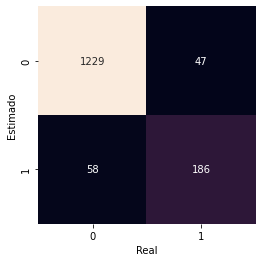

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(y_test, previsoes)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(y_test, previsoes)) # mostra relatório
print('A acurácia é ',accuracy_score(y_test, previsoes)) # exibe acurácia

# **Tuning dos parâmetros com GridSearch**

# Preparação dos dados

In [137]:
# para que o algoritmo encontre um melhor conjuto de parametro, automaticamente ele vai fazer aplicação da validação cruzada.
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [138]:
import pickle
with open('credit.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [139]:
X_train.shape, y_train.shape

((8607, 37), (8607,))

In [140]:
X_test.shape,  y_test.shape

((1520, 37), (1520,))

In [141]:
X = np.concatenate((X_train, X_test), axis = 0)
X.shape

(10127, 37)

In [142]:
X 

array([[-1.05995565,  1.05995565, -0.33338819, ...,  1.41198604,
         0.43170392, -0.86294037],
       [ 0.9434357 , -0.9434357 , -0.33338819, ..., -1.14431527,
        -1.6894823 , -0.99715499],
       [-1.05995565,  1.05995565, -0.33338819, ..., -0.97389518,
        -0.89141223, -0.99715499],
       ...,
       [ 0.9434357 , -0.9434357 , -0.33338819, ..., -1.69818055,
         4.47665902,  1.94105705],
       [ 0.9434357 , -0.9434357 ,  2.99950638, ...,  0.81551574,
         0.47790798, -0.64529503],
       [ 0.9434357 , -0.9434357 , -0.33338819, ...,  1.02854084,
         0.93574817,  2.0462523 ]])

In [143]:
y = np.concatenate((y_train, y_test), axis = 0)
y.shape

(10127,)

In [144]:
y

array([0, 1, 1, ..., 0, 0, 0])

# Árvore de decisão

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}
0.9469743214751443


# Random forest

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9570452756145418


# Knn

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 5, 'p': 1}
0.8809121909010029


# Regressão logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'solver': 'sag', 'tol': 0.0001}
0.9034266145052587


# SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
0.9202136180273724


# Redes neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'logistic', 'batch_size': 56, 'solver': 'adam'}
0.9354207158787613


# **Validação Cruzada**

In [145]:
from sklearn.model_selection import cross_val_score, KFold

In [146]:
resultados_naive = []
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy',min_samples_leaf= 10, min_samples_split=10, splitter='best', random_state=0)
  scores = cross_val_score(arvore, X, y, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  naive = GaussianNB()
  naive = cross_val_score(arvore, X, y, cv = kfold)
  resultados_naive.append(scores.mean())

  random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier(n_neighbors=5, p=1)
  scores = cross_val_score(knn, X, y, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C=2.0, solver= 'sag', tol=0.0001, random_state = 1)
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(C=2.0, kernel='rbf', tol=0.001)
  scores = cross_val_score(svm, X, y, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation='logistic', batch_size= 56, solver='adam')
  scores = cross_val_score(rede_neural, X, y, cv = kfold)
  resultados_rede_neural.append(scores.mean())

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

15


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

16


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

17


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

18


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

19


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

20


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

21


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

22


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

23


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

24


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

25


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

26


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

27


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

28


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

29


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [147]:
resultados = pd.DataFrame({'Naive':resultados_naive, 'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Naive,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.943419,0.943419,0.957344,0.883381,0.903626,0.923474,0.936113
1,0.946777,0.946777,0.957145,0.880815,0.903724,0.922485,0.937594
2,0.942928,0.942928,0.956752,0.881211,0.903626,0.925153,0.938583
3,0.939864,0.939864,0.957638,0.883677,0.904513,0.922880,0.938284
4,0.942728,0.942728,0.956255,0.881999,0.904116,0.922682,0.936309
5,0.946085,0.946085,0.957045,0.883086,0.903821,0.923373,0.938382
6,0.942925,0.942925,0.958131,0.882689,0.904219,0.923372,0.936605
7,0.943712,0.943712,0.958525,0.882687,0.904116,0.924259,0.938480
8,0.944309,0.944309,0.958725,0.880615,0.903426,0.923966,0.937197
9,0.944504,0.944504,0.956946,0.882490,0.904019,0.923077,0.938677


In [148]:
resultados.describe()

,Naive,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.943330,0.943330,0.957648,0.882045,0.903821,0.923307,0.937613
std,0.001735,0.001735,0.000713,0.000848,0.000459,0.000891,0.001392
min,0.938679,0.938679,0.956255,0.880615,0.902835,0.921692,0.933644
25%,0.942851,0.942851,0.957142,0.881407,0.903625,0.922708,0.936629
50%,0.943419,0.943419,0.957590,0.881949,0.903772,0.923324,0.937939
75%,0.944382,0.944382,0.958205,0.882688,0.904116,0.923545,0.938679
max,0.946777,0.946777,0.959119,0.883677,0.905005,0.925841,0.939469


In [149]:
# variação
resultados.var()

Naive            3.009934e-06
Arvore           3.009934e-06
Random forest    5.076746e-07
KNN              7.193179e-07
Logistica        2.108041e-07
SVM              7.940330e-07
Rede neural      1.936872e-06
dtype: float64

In [150]:
#coeficiencia de vairação
(resultados.std() / resultados.mean()) * 100

Naive            0.183914
Arvore           0.183914
Random forest    0.074402
KNN              0.096155
Logistica        0.050799
SVM              0.096510
Rede neural      0.148432
dtype: float64

# **Teste de normalidade nos resultados**

In [169]:
alpha = 0.05

In [170]:
from scipy.stats import shapiro

In [171]:
shapiro(resultados_naive), shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

((0.9356671571731567, 0.06956377625465393),
 (0.9356671571731567, 0.06956377625465393),
 (0.9801169633865356, 0.8286561369895935),
 (0.9668677449226379, 0.4573991298675537),
 (0.9766820073127747, 0.7321614027023315),
 (0.9533393979072571, 0.20754748582839966),
 (0.9254926443099976, 0.03732209652662277))

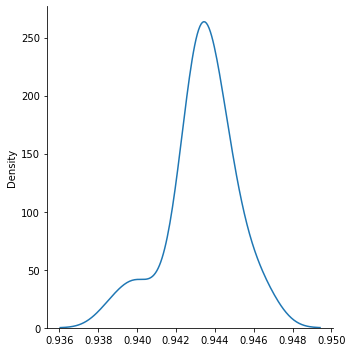

In [172]:
sns.displot(resultados_naive, kind = 'kde');

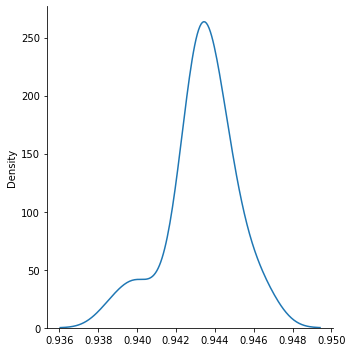

In [173]:
sns.displot(resultados_arvore, kind = 'kde');

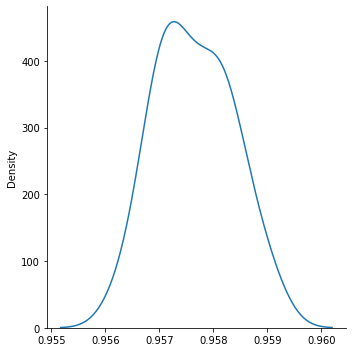

In [174]:
sns.displot(resultados_random_forest, kind = 'kde');

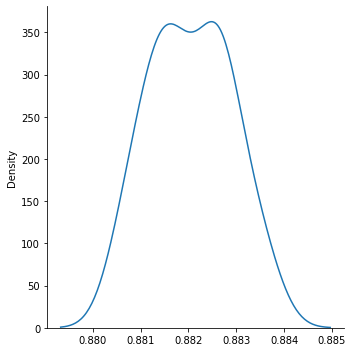

In [175]:
sns.displot(resultados_knn, kind = 'kde');

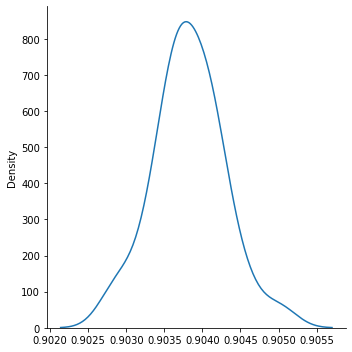

In [176]:
sns.displot(resultados_logistica, kind = 'kde');

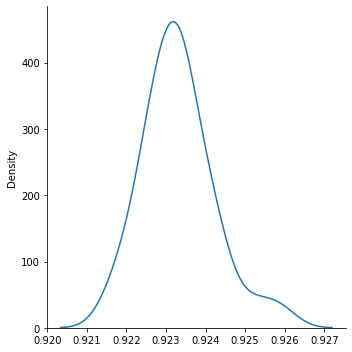

In [177]:
sns.displot(resultados_svm, kind = 'kde');

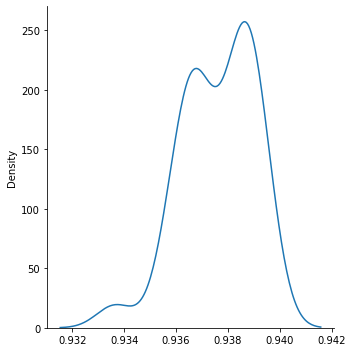

In [178]:
sns.displot(resultados_rede_neural, kind = 'kde');

# **Teste de hipótese com ANOVA e Tukey**

In [182]:
from scipy.stats import f_oneway

In [183]:
_, p = f_oneway(resultados_naive, resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

1.4017555674860846e-263

In [184]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [194]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_naive, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive','naive',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [195]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.943419,arvore
1,0.946777,arvore
2,0.942928,arvore
3,0.939864,arvore
4,0.942728,arvore
...,...,...
205,0.935916,rede_neural
206,0.938681,rede_neural
207,0.938680,rede_neural
208,0.938481,rede_neural


In [196]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [197]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [198]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn  -0.0613 0.001 -0.0622 -0.0604   True
       arvore     logistica  -0.0395 0.001 -0.0404 -0.0386   True
       arvore         naive      0.0   0.9 -0.0009  0.0009  False
       arvore random_forest   0.0143 0.001  0.0134  0.0152   True
       arvore   rede_neural  -0.0057 0.001 -0.0066 -0.0048   True
       arvore           svm    -0.02 0.001 -0.0209 -0.0191   True
          knn     logistica   0.0218 0.001  0.0208  0.0227   True
          knn         naive   0.0613 0.001  0.0604  0.0622   True
          knn random_forest   0.0756 0.001  0.0747  0.0765   True
          knn   rede_neural   0.0556 0.001  0.0546  0.0565   True
          knn           svm   0.0413 0.001  0.0403  0.0422   True
    logistica         naive   0.0395 0.001  0.0386  0.0404   True
    logist

In [199]:
resultados.mean()

Naive            0.943330
Arvore           0.943330
Random forest    0.957648
KNN              0.882045
Logistica        0.903821
SVM              0.923307
Rede neural      0.937613
dtype: float64

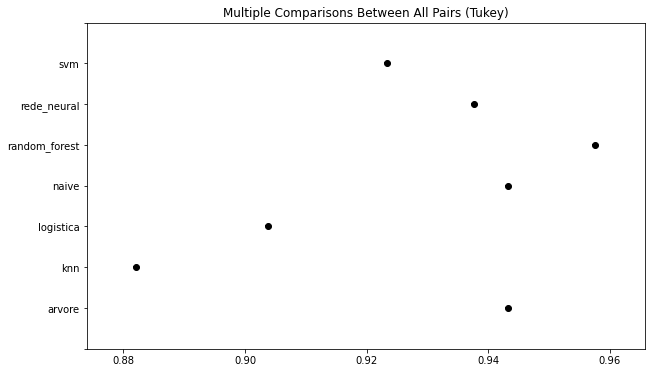

In [200]:
teste_estatistico.plot_simultaneous();

# **Salvar um classificador já treinado**

In [201]:
with open('credit.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [202]:
X = np.concatenate(( X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)

In [203]:
X.shape, y.shape

((10127, 37), (10127,))

In [204]:
# Escolhemos os três melhores algoritmos conforme o gráfico logo acima.
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [205]:
classificador_randomForest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classificador_randomForest.fit(X, y)

RandomForestClassifier(criterion='entropy', random_state=0)

In [206]:
classificador_arvoreDecisao = DecisionTreeClassifier(criterion='entropy',min_samples_leaf= 10, min_samples_split=10, splitter='best', random_state=0)
classificador_arvoreDecisao.fit(X, y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10, random_state=0)

In [207]:
classificador_naiveBayes = GaussianNB()
classificador_naiveBayes.fit(X, y)

GaussianNB()

In [208]:
import pickle
pickle.dump(classificador_randomForest, open('classificador_randomForest.sav', 'wb'))
pickle.dump(classificador_arvoreDecisao, open('classificador_arvoreDecisao.sav', 'wb'))
pickle.dump(classificador_naiveBayes, open('classificador_naiveBayes.sav', 'wb'))

# **Carregar um classificador já treinado**

In [273]:
forest = pickle.load(open('classificador_randomForest.sav', 'rb'))
arvore = pickle.load(open('classificador_arvoreDecisao.sav', 'rb'))
naive = pickle.load(open('classificador_naiveBayes.sav', 'rb'))

In [274]:
novo_registro = X[0]
novo_registro

array([-1.05995565,  1.05995565, -0.33338819, -0.21589388, -0.66852149,
       -0.49808606, -0.23170775,  2.41046809, -0.42007589, -0.2824051 ,
       -0.92821381, -0.79850685,  3.53845931,  3.59580988, -0.46336328,
       -0.40085868, -0.42267548, -0.73643691, -0.35121215,  0.27061076,
       -0.10764411, -0.044484  , -0.24079371,  0.70780236, -0.26654715,
        0.76027724, -1.80951163, -1.32713603,  0.49240377,  2.74198363,
        0.1094377 ,  2.73159674,  0.15082097,  2.9690986 ,  1.41198604,
        0.43170392, -0.86294037])

In [275]:
novo_registro.shape

(37,)

In [276]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 37)

In [277]:
novo_registro

array([[-1.05995565,  1.05995565, -0.33338819, -0.21589388, -0.66852149,
        -0.49808606, -0.23170775,  2.41046809, -0.42007589, -0.2824051 ,
        -0.92821381, -0.79850685,  3.53845931,  3.59580988, -0.46336328,
        -0.40085868, -0.42267548, -0.73643691, -0.35121215,  0.27061076,
        -0.10764411, -0.044484  , -0.24079371,  0.70780236, -0.26654715,
         0.76027724, -1.80951163, -1.32713603,  0.49240377,  2.74198363,
         0.1094377 ,  2.73159674,  0.15082097,  2.9690986 ,  1.41198604,
         0.43170392, -0.86294037]])

In [278]:
forest.predict(novo_registro)

array([0])

In [279]:
arvore.predict(novo_registro)

array([0])

In [280]:
naive.predict(novo_registro)

array([0])

# **Combinação de classificadores**

In [281]:
creditcard.head(2000)

,Usuario,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,52,M,3,Graduate,Married,$80K - $120K,Blue,42,5,2,4,17302.0,1339,15963.0,0.631,1181,30,1.000,0.077
1996,0,48,M,3,College,Divorced,$40K - $60K,Blue,36,3,3,3,12159.0,1665,10494.0,0.608,1426,34,0.545,0.137
1997,0,54,F,1,High School,Single,Less than $40K,Blue,47,6,4,3,2797.0,1627,1170.0,0.413,1566,36,0.714,0.582
1998,0,33,M,1,Uneducated,Single,$60K - $80K,Blue,28,6,3,4,2618.0,1812,806.0,0.706,3319,86,0.911,0.692


In [282]:
novo_registro = X[0]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.05995565,  1.05995565, -0.33338819, -0.21589388, -0.66852149,
         -0.49808606, -0.23170775,  2.41046809, -0.42007589, -0.2824051 ,
         -0.92821381, -0.79850685,  3.53845931,  3.59580988, -0.46336328,
         -0.40085868, -0.42267548, -0.73643691, -0.35121215,  0.27061076,
         -0.10764411, -0.044484  , -0.24079371,  0.70780236, -0.26654715,
          0.76027724, -1.80951163, -1.32713603,  0.49240377,  2.74198363,
          0.1094377 ,  2.73159674,  0.15082097,  2.9690986 ,  1.41198604,
          0.43170392, -0.86294037]]), (1, 37))

In [283]:
resposta_forest = forest.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_naive = naive.predict(novo_registro)

In [284]:
resposta_forest[0], resposta_arvore[0], resposta_naive[0]

(0, 0, 0)

In [285]:
ativo = 0
nao_ativo = 0

if resposta_forest[0] == 1:
  nao_ativo += 1
else:
  ativo += 1

if resposta_arvore[0] == 1:
  nao_ativo += 1
else:
  ativo += 1

if resposta_naive[0] == 1:
  nao_ativo += 1
else:
  ativo += 1

if ativo > nao_ativo:
  print('Cliente continuará com o cartão ativo ')
elif ativo == nao_ativo:
  print('Empate')
else:
  print('Cliente irá cancelar o cartão')

Cliente continuará com o cartão ativo 


# **Rejeição de classificadores**

In [286]:
novo_registro = X[0]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.05995565,  1.05995565, -0.33338819, -0.21589388, -0.66852149,
         -0.49808606, -0.23170775,  2.41046809, -0.42007589, -0.2824051 ,
         -0.92821381, -0.79850685,  3.53845931,  3.59580988, -0.46336328,
         -0.40085868, -0.42267548, -0.73643691, -0.35121215,  0.27061076,
         -0.10764411, -0.044484  , -0.24079371,  0.70780236, -0.26654715,
          0.76027724, -1.80951163, -1.32713603,  0.49240377,  2.74198363,
          0.1094377 ,  2.73159674,  0.15082097,  2.9690986 ,  1.41198604,
          0.43170392, -0.86294037]]), (1, 37))

In [287]:
resposta_forest = forest.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_naive = naive.predict(novo_registro)

In [288]:
resposta_forest[0], resposta_arvore[0], resposta_naive[0]

(0, 0, 0)

In [289]:
probabilidade_forest = forest.predict_proba(novo_registro)
probabilidade_forest

array([[1., 0.]])

In [290]:
confianca_forest = probabilidade_forest.max()
confianca_forest

1.0

In [291]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [292]:
probabilidade_naive = naive.predict_proba(novo_registro)
confianca_naive = probabilidade_naive.max()
confianca_naive

0.9999997332570203

In [293]:
ativo = 0
nao_ativo = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_forest >= confianca_minima:
  algoritmos += 1
  if resposta_forest[0] == 1:
    nao_ativo += 1
  else:
    ativo += 1

if confianca_arvore >= confianca_minima:
  algoritmos += 1
  if resposta_arvore[0] == 1:
    nao_ativo += 1
  else:
    ativo += 1

if confianca_naive >= confianca_minima:
  algoritmos += 1
  if resposta_naive[0] == 1:
    nao_ativo += 1
  else:
    ativo += 1

if ativo > nao_ativo:
  print('Cliente permanecerá ativo, baseado em {} algoritmos'.format(algoritmos))
elif ativo == nao_ativo:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não permanecerá ativo, baseado em {} algoritmos'.format(algoritmos))

Cliente permanecerá ativo, baseado em 3 algoritmos
